In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv('Boats-dataset.csv')

In [3]:
df.head(5)

,Unnamed: 0,id,type,boatClass,make,model,year,condition,length_ft,beam_ft,...,minEngineYear,engineCategory,price,sellerId,city,state,zip,created_date,created_month,created_year
0,1,7252689,power,power-center,Aquasport,210 CC,1992,used,21.0,8.50,...,NaN,outboard-4s,16500.0,217053,Englewood,FL,34224,2019-10-16,10,2019
1,3,7228300,power,power-sportcruiser,Formula,400 Super Sport,2018,used,40.0,11.00,...,2018.0,inboard-outboard,539000.0,44260,Harsens Island,MI,48028,2019-09-24,9,2019
2,5,7271336,power,power-deck,Bayliner,Element 180,2020,new,18.0,7.42,...,2019.0,outboard-4s,26995.0,220570,Marietta,OH,45750,2019-11-02,11,2019
3,6,7222952,power,power-expresscruiser,Regal,32 Express,2015,used,32.0,10.33,...,NaN,multiple,169995.0,34834,North Charleston,SC,29405,2019-09-19,9,2019
4,8,6824832,power,power-aft,Carver,440 Aft Cabin Motor Yacht,1994,used,44.0,15.00,...,1994.0,inboard,109900.0,17942,Middle River,MD,21220,2018-08-29,8,2018


In [4]:
df.duplicated().sum()

0

In [5]:
df.shape

(18903, 26)

In [6]:
df.isnull().mean() * 100

Unnamed: 0         0.000000
id                 0.000000
type               0.000000
boatClass          0.000000
make               0.000000
model              0.185156
year               0.000000
condition          0.000000
length_ft          0.000000
beam_ft           34.407237
dryWeight_lb      62.471565
hullMaterial       0.000000
fuelType          15.616569
numEngines         0.000000
totalHP            4.486060
maxEngineYear     88.335185
minEngineYear     88.499180
engineCategory    55.509707
price              0.000000
sellerId           0.000000
city               0.296249
state              0.000000
zip               45.960959
created_date       0.000000
created_month      0.000000
created_year       0.000000
dtype: float64

In [7]:
df.drop(columns=['Unnamed: 0','id','dryWeight_lb','maxEngineYear','minEngineYear','engineCategory','sellerId','zip'],inplace=True)

In [8]:
df.head()

,type,boatClass,make,model,year,condition,length_ft,beam_ft,hullMaterial,fuelType,numEngines,totalHP,price,city,state,created_date,created_month,created_year
0,power,power-center,Aquasport,210 CC,1992,used,21.0,8.50,fiberglass,gasoline,1,150.0,16500.0,Englewood,FL,2019-10-16,10,2019
1,power,power-sportcruiser,Formula,400 Super Sport,2018,used,40.0,11.00,fiberglass,diesel,2,800.0,539000.0,Harsens Island,MI,2019-09-24,9,2019
2,power,power-deck,Bayliner,Element 180,2020,new,18.0,7.42,fiberglass,gasoline,1,75.0,26995.0,Marietta,OH,2019-11-02,11,2019
3,power,power-expresscruiser,Regal,32 Express,2015,used,32.0,10.33,fiberglass,gasoline,2,600.0,169995.0,North Charleston,SC,2019-09-19,9,2019
4,power,power-aft,Carver,440 Aft Cabin Motor Yacht,1994,used,44.0,15.00,fiberglass,diesel,2,700.0,109900.0,Middle River,MD,2018-08-29,8,2018


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18903 entries, 0 to 18902
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   type           18903 non-null  object 
 1   boatClass      18903 non-null  object 
 2   make           18903 non-null  object 
 3   model          18868 non-null  object 
 4   year           18903 non-null  int64  
 5   condition      18903 non-null  object 
 6   length_ft      18903 non-null  float64
 7   beam_ft        12399 non-null  float64
 8   hullMaterial   18903 non-null  object 
 9   fuelType       15951 non-null  object 
 10  numEngines     18903 non-null  int64  
 11  totalHP        18055 non-null  float64
 12  price          18903 non-null  float64
 13  city           18847 non-null  object 
 14  state          18903 non-null  object 
 15  created_date   18903 non-null  object 
 16  created_month  18903 non-null  int64  
 17  created_year   18903 non-null  int64  
dtypes: flo

In [10]:
df.fillna({'beam_ft':df['beam_ft'].mean()},inplace=True)
df.fillna({'model':df['model'].mode()[0]},inplace=True)
df.fillna({'fuelType':df['fuelType'].mode()[0]},inplace=True)
df.fillna({'totalHP':df['totalHP'].mean()},inplace=True)
df.fillna({'city':df['city'].mode()[0]},inplace=True)

In [11]:
df['created_day'] = df['created_date'].str.split('-').str.get(2).astype('int32')
df.drop(columns=['created_date'],inplace=True)

In [12]:
df.isnull().sum()

type             0
boatClass        0
make             0
model            0
year             0
condition        0
length_ft        0
beam_ft          0
hullMaterial     0
fuelType         0
numEngines       0
totalHP          0
price            0
city             0
state            0
created_month    0
created_year     0
created_day      0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18903 entries, 0 to 18902
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   type           18903 non-null  object 
 1   boatClass      18903 non-null  object 
 2   make           18903 non-null  object 
 3   model          18903 non-null  object 
 4   year           18903 non-null  int64  
 5   condition      18903 non-null  object 
 6   length_ft      18903 non-null  float64
 7   beam_ft        18903 non-null  float64
 8   hullMaterial   18903 non-null  object 
 9   fuelType       18903 non-null  object 
 10  numEngines     18903 non-null  int64  
 11  totalHP        18903 non-null  float64
 12  price          18903 non-null  float64
 13  city           18903 non-null  object 
 14  state          18903 non-null  object 
 15  created_month  18903 non-null  int64  
 16  created_year   18903 non-null  int64  
 17  created_day    18903 non-null  int32  
dtypes: flo

In [14]:
df.head(1)

,type,boatClass,make,model,year,condition,length_ft,beam_ft,hullMaterial,fuelType,numEngines,totalHP,price,city,state,created_month,created_year,created_day
0,power,power-center,Aquasport,210 CC,1992,used,21.0,8.5,fiberglass,gasoline,1,150.0,16500.0,Englewood,FL,10,2019,16


In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.shape

(18001, 18)

In [17]:
df.describe()

,year,length_ft,beam_ft,numEngines,totalHP,price,created_month,created_year,created_day
count,18001.000000,18001.000000,18001.000000,18001.000000,18001.000000,1.800100e+04,18001.000000,18001.000000,18001.000000
mean,2012.838787,23.712992,15.596153,1.073607,117.970781,6.779370e+05,6.895228,2018.483251,15.893117
std,10.668959,13.474300,29.597685,0.434452,285.407828,7.490460e+07,3.030094,1.113283,8.991509
min,1910.000000,1.000000,0.080000,0.000000,0.000000,5.000000e+02,1.000000,2003.000000,1.000000
25%,2009.000000,18.170000,8.060000,1.000000,0.000000,1.951500e+04,4.000000,2018.000000,8.000000
50%,2019.000000,21.000000,9.000000,1.000000,0.000000,3.452900e+04,8.000000,2019.000000,17.000000
75%,2019.000000,25.000000,16.196930,1.000000,115.000000,5.856300e+04,9.000000,2019.000000,23.000000
max,2020.000000,375.000000,1311.000000,4.000000,7200.000000,1.000000e+10,12.000000,2019.000000,31.000000


In [18]:
out_col = ['length_ft','beam_ft','totalHP']

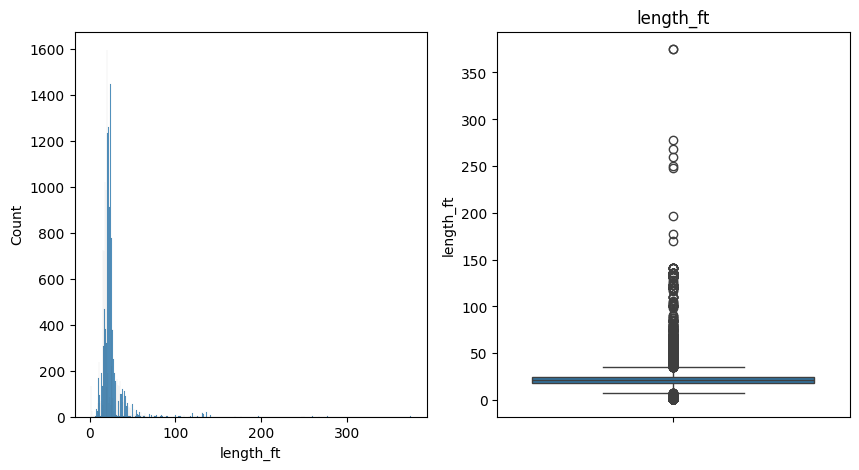

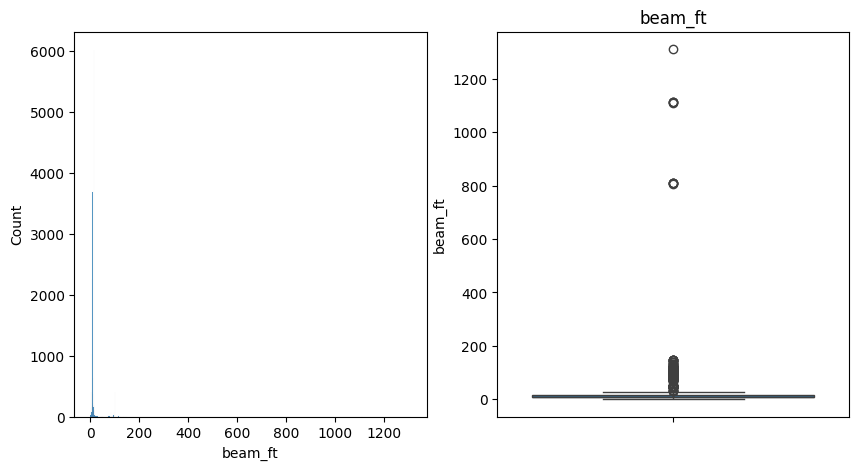

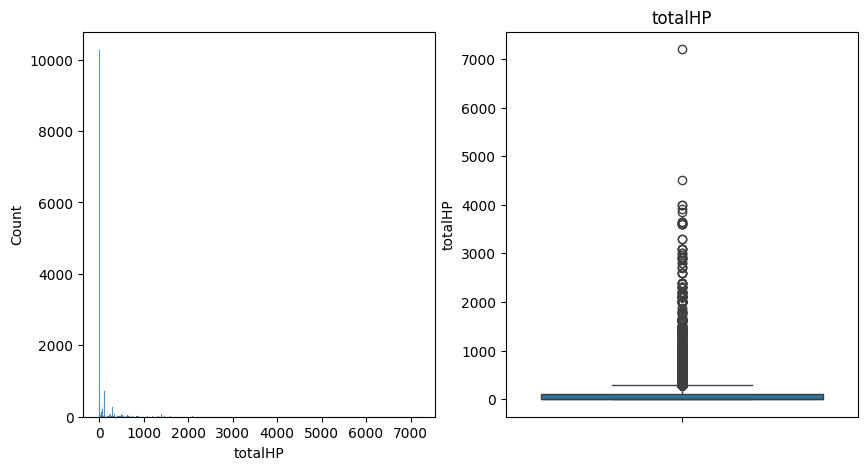

In [19]:
for col in out_col:
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    sns.histplot(df[col])
    
    plt.subplot(122)
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()

In [20]:
for out in out_col:
    q1 = df[out].quantile(0.25)
    q3 = df[out].quantile(0.75)
    IQR =  q3-q1
    min = q1 - 1.5 * IQR
    max = q3 + 1.5 * IQR
    print(min,max)
    df = df[(df[out] >=min) & (df[out] <=max)]

7.925000000000004 35.245
-4.295395596419066 28.492325994031777
-172.5 287.5


In [21]:
df.shape

(14516, 18)

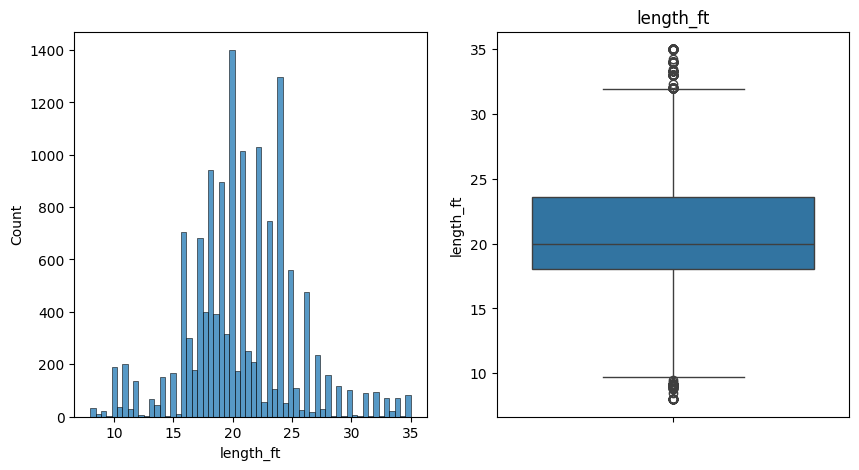

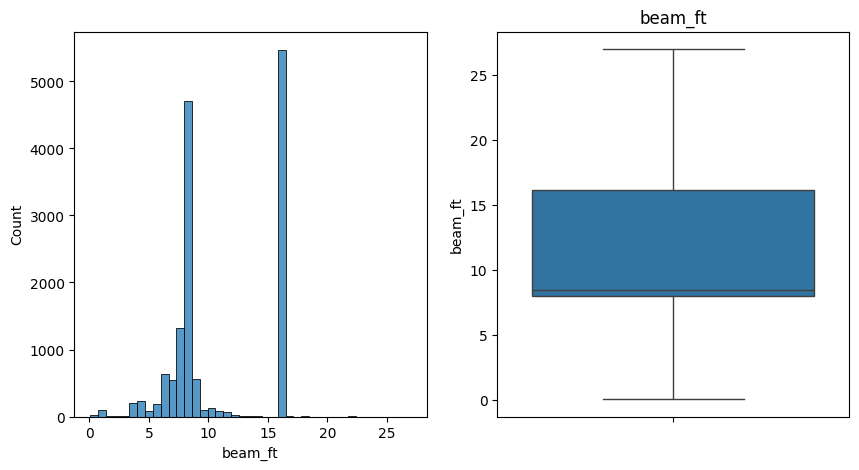

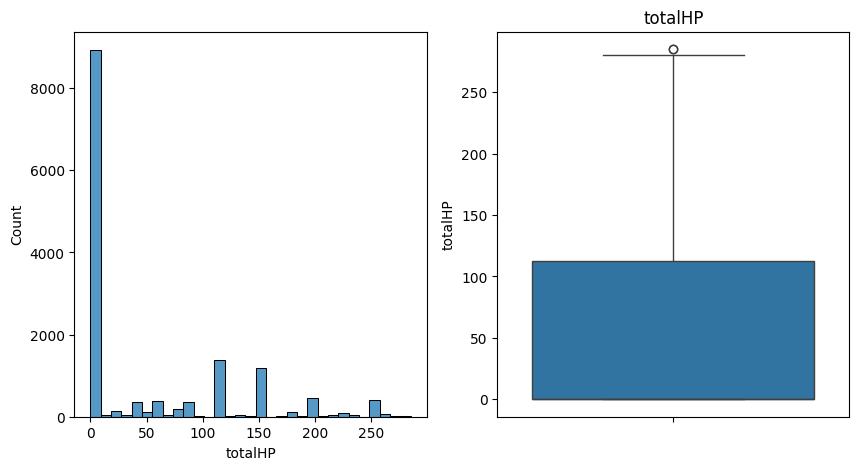

In [22]:
for col in out_col:
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    sns.histplot(df[col])
    
    plt.subplot(122)
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()

In [23]:
df = df.reset_index(drop=True)

In [24]:
df1 = df.copy()

In [25]:
df1.head()

,type,boatClass,make,model,year,condition,length_ft,beam_ft,hullMaterial,fuelType,numEngines,totalHP,price,city,state,created_month,created_year,created_day
0,power,power-center,Aquasport,210 CC,1992,used,21.0,8.50,fiberglass,gasoline,1,150.0,16500.0,Englewood,FL,10,2019,16
1,power,power-deck,Bayliner,Element 180,2020,new,18.0,7.42,fiberglass,gasoline,1,75.0,26995.0,Marietta,OH,11,2019,2
2,sail,sail-racercruiser,Newport,Mk III,1986,used,30.0,10.67,fiberglass,diesel,1,0.0,25500.0,Mystic,CT,3,2011,25
3,power,power-pontoon,Starcraft,EXS-3 Sport,2019,new,23.7,8.50,aluminum,gasoline,1,200.0,44507.0,Selbyville,DE,2,2019,13
4,sail,sail-cruiser,Hunter,30,1989,used,30.0,11.00,fiberglass,diesel,1,18.0,31000.0,Frisco,CO,11,2019,2


In [26]:
count  = df1['make'].value_counts()
data =count[count>20].index
df1 = df1[df1['make'].isin(data)]
print(df1.shape)

(12609, 18)


In [27]:
df1.head()

,type,boatClass,make,model,year,condition,length_ft,beam_ft,hullMaterial,fuelType,numEngines,totalHP,price,city,state,created_month,created_year,created_day
1,power,power-deck,Bayliner,Element 180,2020,new,18.00,7.42,fiberglass,gasoline,1,75.0,26995.0,Marietta,OH,11,2019,2
3,power,power-pontoon,Starcraft,EXS-3 Sport,2019,new,23.70,8.50,aluminum,gasoline,1,200.0,44507.0,Selbyville,DE,2,2019,13
5,power,power-bay,Xpress,Boats H22B,2019,new,22.00,7.75,aluminum,gasoline,1,175.0,36900.0,Fenton,MI,11,2018,27
6,power,power-bay,Xpress,Boats H20B,2019,new,20.00,7.75,aluminum,gasoline,1,115.0,22900.0,Fenton,MI,11,2018,27
7,power,power-pontoon,Sun Tracker,Party Barge 24 DLX,2019,new,26.17,8.50,aluminum,other,1,150.0,35360.0,Fairland,IN,8,2018,18


In [28]:
df1.shape

(12609, 18)

In [29]:
df1.duplicated().sum()

0

In [30]:
df2 = df1.copy()

In [31]:
df2.head(1)

,type,boatClass,make,model,year,condition,length_ft,beam_ft,hullMaterial,fuelType,numEngines,totalHP,price,city,state,created_month,created_year,created_day
1,power,power-deck,Bayliner,Element 180,2020,new,18.0,7.42,fiberglass,gasoline,1,75.0,26995.0,Marietta,OH,11,2019,2


In [32]:
X = df2.drop(columns=['price'])
Y  = df2['price']

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

In [34]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb

In [35]:
trf1 = ColumnTransformer([
    ('One', OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first', categories='auto'), [0, 1, 2, 3, 5, 8, 9, 12, 13])
], remainder='passthrough')

In [36]:
trf2 = StandardScaler()

In [37]:
trf3 = xgb.XGBRegressor()

In [38]:
pipe = make_pipeline(trf1,trf2,trf3)

In [39]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('One',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [0, 1, 2, 3, 5, 8, 9, 12,
                                                   13])])),
                ('standardscaler', StandardScaler()),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=Non...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [40]:
print(pipe.score(x_train,y_train))
print(pipe.score(x_test,y_test))

0.963971690440119
0.928345067043603


In [41]:
y_pred = pipe.predict(x_test)

In [42]:
r2_score(y_test,y_pred)

0.928345067043603

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
param_grid = {
    'xgbregressor__n_estimators': [300,400],
    'xgbregressor__max_depth': [5,6],
}

In [45]:
model = GridSearchCV(pipe,param_grid=param_grid,cv=2,verbose=1,n_jobs=-1)

In [46]:
model.fit(x_train,y_train)

Fitting 2 folds for each of 4 candidates, totalling 8 fits


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('One',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         [0, 1,
                                                                          2, 3,
                                                                          5, 8,
                                                                          9, 12,
                                                                          13])])),
                                       ('standardscaler', StandardScaler()),
                                       ('xgbregressor',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylev...
                                                     max_cat_threshold=None,
                                                     max_cat_to_onehot=None,
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'xgbregressor__max_depth': [5, 6],
                         'xgbregressor__n_estimators': [300, 400]},
             verbose=1)

In [47]:
model.best_params_

{'xgbregressor__max_depth': 5, 'xgbregressor__n_estimators': 400}

In [48]:
model.score(x_train,y_train)

0.9769748659533952

In [49]:
model.score(x_test,y_test)

0.9385456328056512

In [50]:
y_pred = model.predict(x_test)

In [51]:
r2_score(y_test,y_pred)

0.9385456328056512

In [52]:
x_train.iloc[111].values

array(['power', 'power-pwc', 'Sea-Doo', 'GTI™ 90', 2019, 'new', 11.05,
       4.0, 'fiberglass', 'gasoline', 1, 0.0, 'Springdale', 'AR', 11,
       2018, 2], dtype=object)

In [53]:
y_train.iloc[111]

8799.0

In [54]:
input = x_train.iloc[111].values
reshaped_data = np.asarray(input).reshape(1,-1)
model.predict(reshaped_data)[0]

11384.897

In [55]:
import pickle

In [56]:
with open('clean_data.pkl', 'wb') as f:
    pickle.dump(X, f)

In [57]:
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)